<a href="https://colab.research.google.com/github/jianfeiZhao/BI_projs/blob/master/Thinkings%2BAction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

新闻内容自动提取及呈现

In [3]:
import requests
from bs4 import BeautifulSoup

url = 'https://3w.huanqiu.com/a/c36dc8/3xqGPRBcUE6?agt=8'
html = requests.get(url, timeout=10)
content = html.content
#print(content)

# 通过content创建BS对象
soup = BeautifulSoup(content, 'html.parser', from_encoding='utf-8')
text = soup.get_text()
#print(text)

In [18]:
import jieba
import jieba.analyse
import jieba.posseg as pseg

jieba.add_word('世卫组织')

# 获取人物、地点
words = pseg.lcut(text)
# 人物、地点集合
news_person = {word for word, flag in words if flag=='nr'}  # 人物词性'nr'
news_place = {word for word, flag in words if flag=='ns'}  # 地点词性'ns'
print('新闻中的人物：', news_person)
print('新闻中的地点：', news_place)

新闻中的人物： {'朱梦颖', '薛艺磊', '特朗普', '特雷斯', '白宫', '刘洋'}
新闻中的地点： {'中国', '美', '美国'}


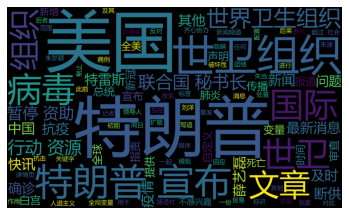

In [19]:
import re

# 去掉非中文
text = re.sub('[^\u4e00-\u9fa5。，！：、]{3,}', '', text)
#print(text)

# 去停用词
def drop_stopwords(f):
  stopwords = ['不是', '现在', '时候', '没有', '环球网', '减少']
  for word in stopwords:
    f = f.replace(word, '')
  return f

# 生成词云
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def wordcloud(f):
  f = drop_stopwords(f)
  seg_list = jieba.lcut(f)
  cut_text = " ".join(seg_list)
  wc = WordCloud(
		max_words=100,
		width=2000,
		height=1200,
    font_path='./msyh.ttf'
    )
  wordcloud = wc.generate(cut_text)
  wordcloud.to_file("wordcloud.jpg")
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

wordcloud(text)

In [17]:
!pip install textrank4zh

  Created wheel for textrank4zh: filename=textrank4zh-0.3-cp36-none-any.whl size=13422 sha256=c71affa2a305695a50ce3ff546bf0cdd94000f0c31e517390f20541925b30a3d
  Stored in directory: /root/.cache/pip/wheels/91/85/e6/97fc29d803101d979e4fa5dcbbea3492789d77e0d1b6d49fa3
Successfully built textrank4zh


In [21]:
# 输出关键词，设置文本小写，窗口为2
from textrank4zh import TextRank4Keyword, TextRank4Sentence
tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=3)
print('关键词：')
for item in tr4w.get_keywords(10, word_min_len=2):
    print(item.word, item.weight)

# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source = 'all_filters')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
	# index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

关键词：
特朗普 0.025079849097525364
美国 0.02056043169221102
环球网 0.01983827505010341
病毒 0.016302457356500592
组织 0.013774505451738759
国际 0.013378503218073738
文章 0.013004433598340323
问题 0.012662602325569648
中国 0.012253716719389183
确诊 0.011857378942413435
摘要：
0 0.10398454564198222 特朗普宣布“断供”世卫，联合国秘书长：现在不是减少抗疫行动所需资源的时候全局变量配置文章类型国际新闻频道中美贸易搜索关键字特朗普,特雷斯,环球网世卫,最新消息,快讯,组织领导人模板否 1是环球网来源文章标识否 1是详情页媒体页标签页自定义变量国际新闻自定义变量薛艺磊特朗普宣布“断供”世卫，联合国秘书长：现在不是减少抗疫行动所需资源的时候特朗普,特雷斯,环球网世卫,最新消息,快讯,组织环球网国际新闻国际新闻:独家薛艺磊特朗普宣布“断供”世卫，联合国秘书长：现在不是减少抗疫行动所需资源的时候朱梦颖环球网快讯】美国总统特朗普14日宣布暂停资助世卫组织
9 0.08412184164857629 就在特朗普宣布将暂停资助世界卫生组织这天，据美国约翰斯·霍普金斯大学发布的全球新冠肺炎数据实时统计系统，截至美国东部时间4月14日晚6时，全美共报告新冠肺炎确诊例，死亡例，共检测例
4 0.08032438393130321 此前报道：特朗普宣布美国将暂停资助世卫组织，同日美国确诊病例超过60万【环球网报道 记者 刘洋消息，美国总统特朗普14日在白宫记者会上宣布，美国将暂停资助世界卫生组织，并对后者进行审查
